In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans  

In [2]:
df = pd.read_csv('Cleaned.csv', index_col=0)

In [3]:
df.head()

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,AcceptedCmp2,Complain,Response,Age,Amount_Total,Total_Purchases,Children,Family_Size,Total_AcceptedCmp,Days_Active
0,Graduation,Single,58138.0,58,635,88,546.0,172,88,88,...,0,0,1,57.0,1445,25.0,0,1,1,914
1,Graduation,Single,46344.0,38,11,1,6.0,2,1,6,...,0,0,0,60.0,25,6.0,2,3,0,88
2,Graduation,In Relationship,71613.0,26,426,49,127.0,111,21,42,...,0,0,0,49.0,665,21.0,0,2,0,447
3,Graduation,In Relationship,26646.0,26,11,4,20.0,10,3,5,...,0,0,0,30.0,43,8.0,1,3,0,40
4,PhD,In Relationship,58293.0,94,173,43,118.0,46,27,15,...,0,0,0,33.0,376,19.0,1,3,0,228


In [4]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Age', 'Amount_Total',
       'Total_Purchases', 'Children', 'Family_Size', 'Total_AcceptedCmp',
       'Days_Active'],
      dtype='object')

In [5]:
def education(data):
    if data == 'Basic':
        return 1
    elif data == 'PhD':
        return 3
    return 2

df['Education'] = df['Education'].apply(education)

In [6]:
df['Marital_Status'] = df['Marital_Status'].apply(lambda x: 1 if x == 'In Relationship' else 0)

In [7]:
model_features = df[['Education', 'Marital_Status', 'Income', 'Complain', 'Amount_Total','Total_Purchases', 
                     'Children', 'Total_AcceptedCmp', 'Days_Active']]

In [8]:
MinMaxScaler = MinMaxScaler()

In [9]:
scaled_features = MinMaxScaler.fit_transform(model_features)

In [10]:
df_feat = pd.DataFrame(scaled_features,columns=model_features.columns)
df_feat.head()

,Education,Marital_Status,Income,Complain,Amount_Total,Total_Purchases,Children,Total_AcceptedCmp,Days_Active
0,0.5,0.0,0.543739,0.0,0.593570,0.641026,0.000000,0.2,0.873252
1,0.5,0.0,0.430052,0.0,0.008244,0.153846,0.666667,0.0,0.151224
2,0.5,1.0,0.673630,0.0,0.272053,0.538462,0.000000,0.0,0.465035
3,0.5,1.0,0.240175,0.0,0.015664,0.205128,0.333333,0.0,0.109266
4,1.0,1.0,0.545233,0.0,0.152927,0.487179,0.333333,0.0,0.273601


In [11]:
X = scaled_features

In [12]:
#Elbow Method - Inertia plot
inertia = []
#looping the inertia calculation for each k
for k in range(1, 10):
    #Assign KMeans as cluster_model
    cluster_model = KMeans(n_clusters = k, random_state = 101)
    #Fit cluster_model to X
    cluster_model.fit(X)
    #Get the inertia value
    inertia_value = cluster_model.inertia_
    #Append the inertia_value to inertia list
    inertia.append(inertia_value)

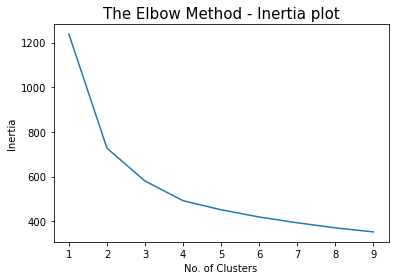

In [13]:
##Inertia plot
plt.plot(range(1, 10), inertia)
plt.title('The Elbow Method - Inertia plot', fontsize = 15)
plt.xlabel('No. of Clusters')
plt.ylabel('Inertia')
plt.show()

In [14]:
inertia

[1237.3376073316565,
 727.5124199995922,
 580.3561544058665,
 492.3325950903863,
 451.65672723956055,
 419.326286724563,
 393.53440323306506,
 370.93277635106773,
 352.6206220656226]

In [15]:
kmeans = KMeans(n_clusters = 3, random_state = 101)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=101)

In [16]:
kmeans.cluster_centers_

array([[6.28951747e-01, 1.00000000e+00, 6.61344999e-01, 6.65557404e-03,
        4.58808005e-01, 5.60518793e-01, 1.93566278e-01, 1.51081531e-01,
        5.02143863e-01],
       [5.98101266e-01, 7.77156117e-16, 4.84090336e-01, 8.86075949e-03,
        2.38684296e-01, 3.79292438e-01, 3.03797468e-01, 1.04556962e-01,
        4.78789723e-01],
       [5.69110577e-01, 1.00000000e+00, 3.48675286e-01, 1.08173077e-02,
        6.10647275e-02, 2.51818294e-01, 4.19871795e-01, 3.17307692e-02,
        4.64624168e-01]])

In [17]:
model_features['Cluster'] = kmeans.labels_ + 1

<ipython-input-17-6aa65b437f9a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_features['Cluster'] = kmeans.labels_ + 1


In [18]:
model_features.head()

,Education,Marital_Status,Income,Complain,Amount_Total,Total_Purchases,Children,Total_AcceptedCmp,Days_Active,Cluster
0,2,0,58138.0,0,1445,25.0,0,1,914,2
1,2,0,46344.0,0,25,6.0,2,0,88,2
2,2,1,71613.0,0,665,21.0,0,0,447,1
3,2,1,26646.0,0,43,8.0,1,0,40,3
4,3,1,58293.0,0,376,19.0,1,0,228,3


<AxesSubplot:xlabel='Cluster', ylabel='count'>

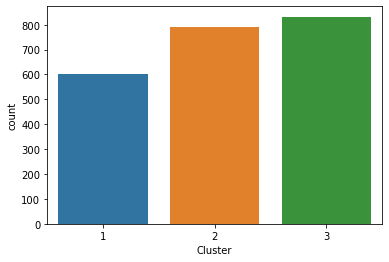

In [19]:
sns.countplot(x='Cluster', data=model_features)

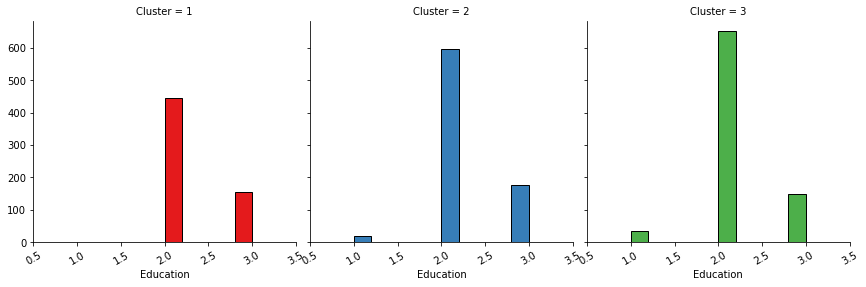

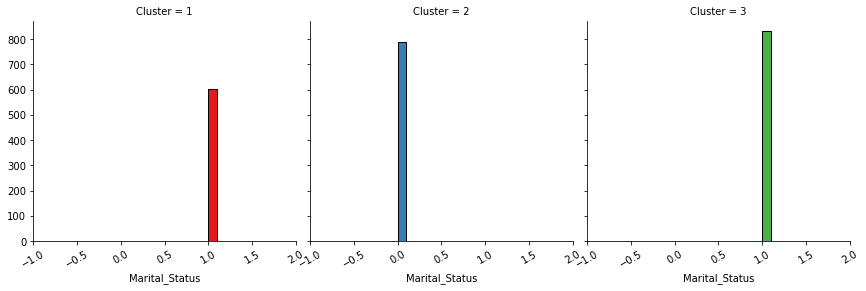

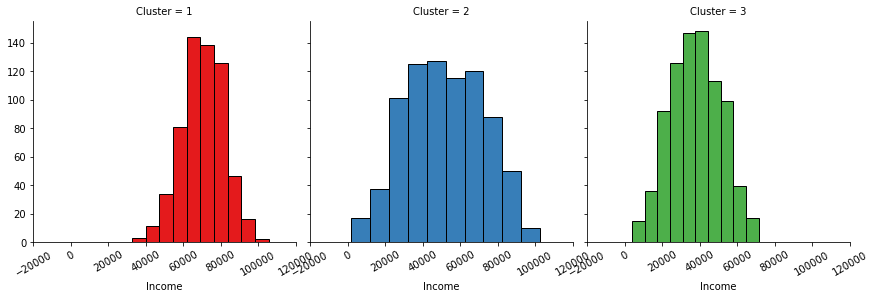

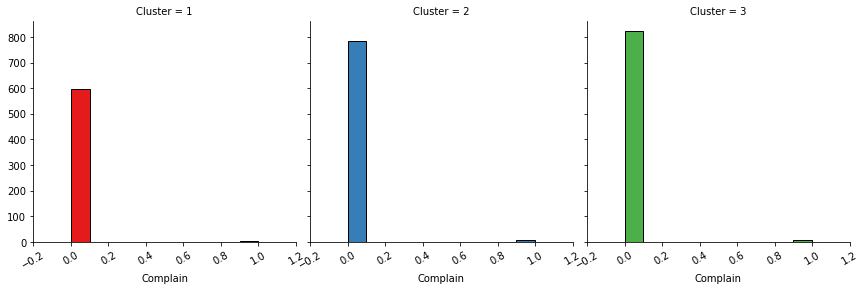

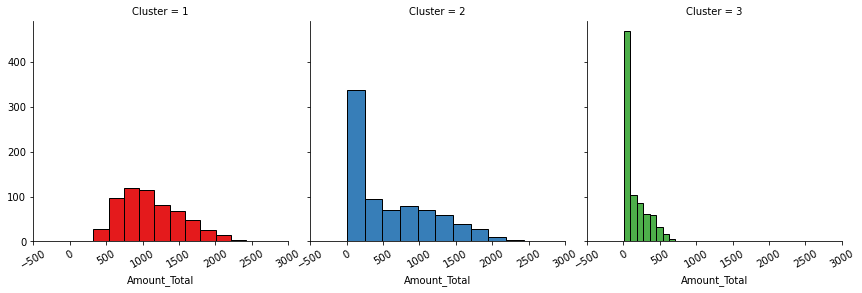

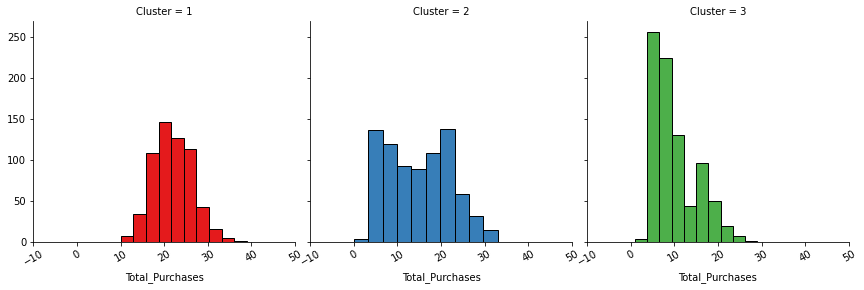

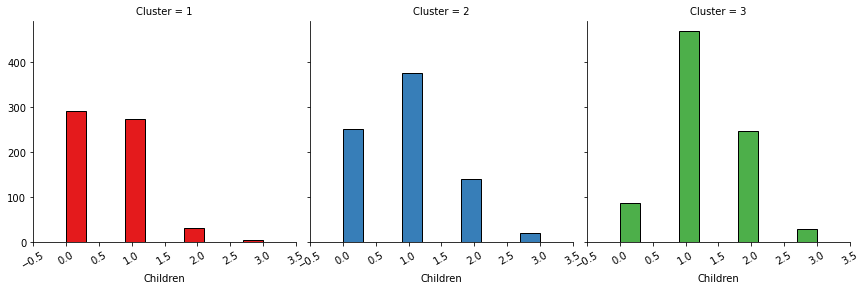

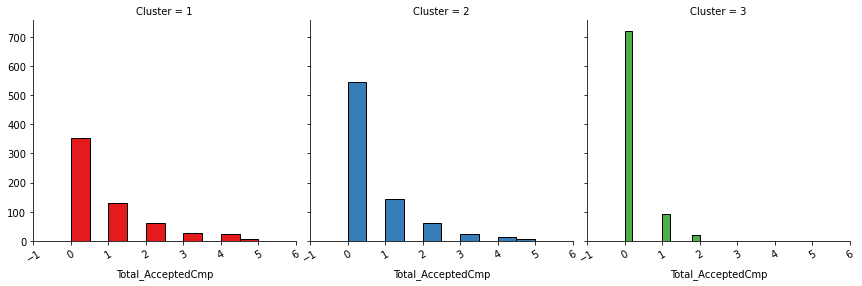

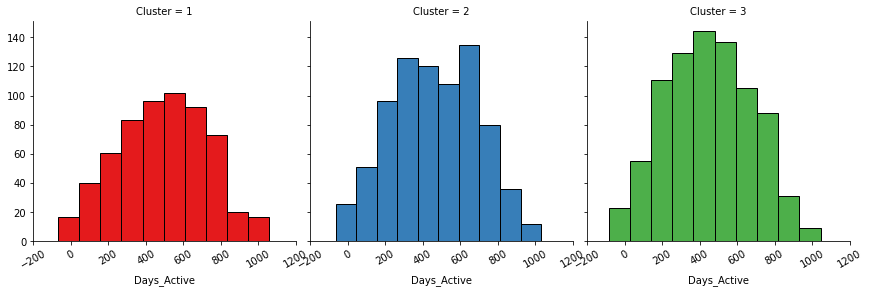

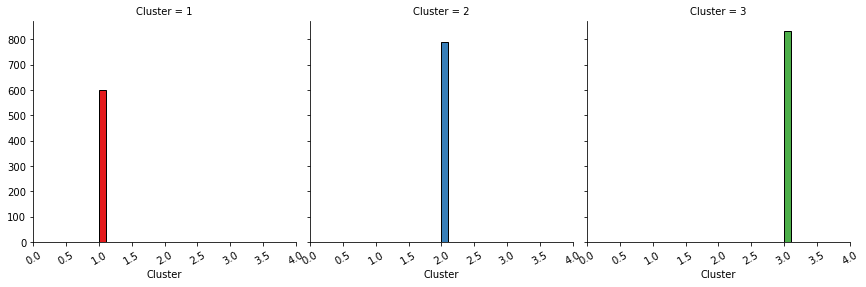

In [20]:
for i in model_features:
    diag = sns.FacetGrid(model_features, col = 'Cluster', hue = 'Cluster', palette = "Set1", height=4)
    diag.map(plt.hist, i, bins=10, ec="k") 
    diag.set_xticklabels(rotation=30, color = 'black')

<font size="4">From this prediction, there are three types of customers: </font>

<font size="4">First type:</font><br>
<font size="3">- Most of them are Graduates and Postgraduates</font><br>
<font size="3">- Married</font><br>
<font size="3">- Have an approximately 40k-100k of income</font><br>
<font size="3">- Most of them don't complain</font><br>
<font size="3">- Bought approximately 400-2200 products</font><br>
<font size="3">- Made a purchase approximately 15-35 times</font><br>
<font size="3">- Many of them either have a child or don't have a child</font><br>
<font size="3">- Only some accepted the marketing campaign</font><br>
<font size="3">- Have loyalty with the company for a long period of time</font><br>

<font size="4">Second type:</font><br>
<font size="3">- Have higher graduates and slightly higher undergraduates and postgraduates than the first type</font><br>
<font size="3">- Not Married</font><br>
<font size="3">- Have an approximately 20k-90k of income</font><br>
<font size="3">- Most of them don't complain</font><br>
<font size="3">- Bought approximately 200-1500 products</font><br>
<font size="3">- Made a purchase approximately 5-25 times</font><br>
<font size="3">- Most of them have a child</font><br>
<font size="3">- Only some accepted the marketing campaign</font><br>
<font size="3">- Higher number of people have loyalty with the company for a long period of time compared to the first type</font><br>

<font size="4">Third type:</font><br>
<font size="3">- Have higher graduates, slightly higher undergraduates, and slightly lower postgraduates than the second type</font><br>
<font size="3">- Married</font><br>
<font size="3">- Have an approximately 10k-60k of income</font><br>
<font size="3">- Most of them don't complain</font><br>
<font size="3">- Bought approximately 100-500 products</font><br>
<font size="3">- Made a purchase approximately 5-20 times</font><br>
<font size="3">- Most of them have a child</font><br>
<font size="3">- Only some accepted the marketing campaign</font><br>
<font size="3">- Slightly higher number of people have loyalty with the company for a long period of time compared to the second type</font><br>